# SSL dengan Autoencoder

## Import Modules

In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import numpy as np

from sklearn.preprocessing import MinMaxScaler

from torchvision import datasets
import torchvision.transforms as T

import visualization_utils as vu
import train_utils as tu
import autoencoder as ae

## Define Constants

In [2]:
DATA_DIR = './data'
MODEL_DIR = './models'

EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
dz = 300

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Data Preparation

In [3]:
training_data = datasets.MNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

In [4]:
"""Create data loaders"""
train_dl = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
X_train = training_data.data
X_test = test_data.data

[n, dx1, dx2] = X_train.shape
n, dx1, dx2

(60000, 28, 28)

### Reshape

In [6]:
X_train_reshaped = torch.reshape(X_train, (-1, dx1*dx2)).float()
X_test_reshaped = torch.reshape(X_test, (-1, dx1*dx2)).float()

X_train_reshaped.shape, X_test_reshaped.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

### Scale using MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_train_scaled.shape

(60000, 784)

### Visualize Scaled X train

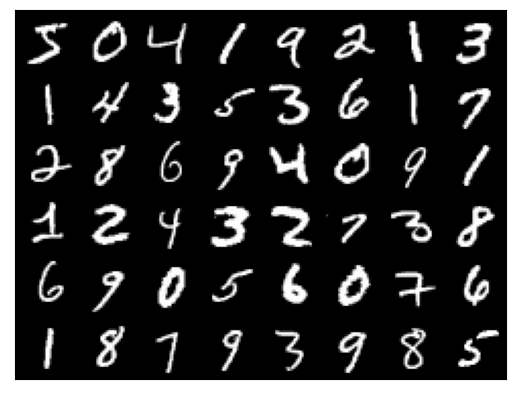

In [8]:
viz = np.reshape(X_train_scaled, (-1, dx1, dx2))
grid = vu.set_grid(viz, num_cells=48)
vu.show(grid)

## Train Autoencoder

In [9]:
print(f"Device: {DEVICE}")

Device: cuda


In [10]:
model = ae.MLPAutoEnc(d_in=dx1*dx2, d_z=dz, d_h=512).to(DEVICE)
print(model)

# Persistent file to store the model
model_path = os.path.join(MODEL_DIR, 'uns_ae_mnist.pth')

MLPAutoEnc(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=300, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=300, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [11]:
"""Define loss function"""
loss_fn = nn.MSELoss()

"""Define optimizer"""
optimizer = optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)

In [12]:
"""Train the Autoencoder"""

for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train_uns(train_dl, model, loss_fn, optimizer)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    test_loss = tu.test_uns(test_dl, model, loss_fn)
    print(f" > Test reconstruction loss: {test_loss:>.2f}")
    
    # Save model
    torch.save(model.state_dict(), model_path)
    print(f"Model {model_path} stored!")
    
print("Done!")

Epoch 1 out of 100
 ------------
Loss: 0.231258 [    0]/60000
Loss: 0.039341 [12800]/60000
Loss: 0.025731 [25600]/60000
Loss: 0.017594 [38400]/60000
Loss: 0.013660 [51200]/60000
 > Training time: 6.40 seconds
 > Test reconstruction loss: 0.01
Model ./models\uns_ae_mnist.pth stored!
Epoch 2 out of 100
 ------------
Loss: 0.013407 [    0]/60000
Loss: 0.011777 [12800]/60000
Loss: 0.009834 [25600]/60000
Loss: 0.008463 [38400]/60000
Loss: 0.007522 [51200]/60000
 > Training time: 5.04 seconds
 > Test reconstruction loss: 0.01
Model ./models\uns_ae_mnist.pth stored!
Epoch 3 out of 100
 ------------
Loss: 0.007727 [    0]/60000
Loss: 0.007504 [12800]/60000
Loss: 0.006480 [25600]/60000
Loss: 0.005765 [38400]/60000
Loss: 0.005468 [51200]/60000
 > Training time: 4.83 seconds
 > Test reconstruction loss: 0.01
Model ./models\uns_ae_mnist.pth stored!
Epoch 4 out of 100
 ------------
Loss: 0.005698 [    0]/60000
Loss: 0.005680 [12800]/60000
Loss: 0.005036 [25600]/60000
Loss: 0.004505 [38400]/60000
Lo

Loss: 0.001354 [12800]/60000
Loss: 0.001327 [25600]/60000
Loss: 0.001223 [38400]/60000
Loss: 0.001205 [51200]/60000
 > Training time: 4.66 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 31 out of 100
 ------------
Loss: 0.001635 [    0]/60000
Loss: 0.001348 [12800]/60000
Loss: 0.001310 [25600]/60000
Loss: 0.001128 [38400]/60000
Loss: 0.001191 [51200]/60000
 > Training time: 4.74 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 32 out of 100
 ------------
Loss: 0.001651 [    0]/60000
Loss: 0.001313 [12800]/60000
Loss: 0.001289 [25600]/60000
Loss: 0.001133 [38400]/60000
Loss: 0.001173 [51200]/60000
 > Training time: 4.81 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 33 out of 100
 ------------
Loss: 0.001732 [    0]/60000
Loss: 0.001305 [12800]/60000
Loss: 0.001281 [25600]/60000
Loss: 0.001110 [38400]/60000
Loss: 0.001122 [51200]/60000
 > Training time: 4.97 seconds
 

Loss: 0.000929 [12800]/60000
Loss: 0.000984 [25600]/60000
Loss: 0.000852 [38400]/60000
Loss: 0.000861 [51200]/60000
 > Training time: 5.02 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 60 out of 100
 ------------
Loss: 0.001049 [    0]/60000
Loss: 0.000912 [12800]/60000
Loss: 0.000945 [25600]/60000
Loss: 0.000817 [38400]/60000
Loss: 0.000833 [51200]/60000
 > Training time: 4.93 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 61 out of 100
 ------------
Loss: 0.000998 [    0]/60000
Loss: 0.000901 [12800]/60000
Loss: 0.000940 [25600]/60000
Loss: 0.000839 [38400]/60000
Loss: 0.000828 [51200]/60000
 > Training time: 4.86 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 62 out of 100
 ------------
Loss: 0.000965 [    0]/60000
Loss: 0.000879 [12800]/60000
Loss: 0.000939 [25600]/60000
Loss: 0.000831 [38400]/60000
Loss: 0.000818 [51200]/60000
 > Training time: 4.92 seconds
 

Loss: 0.000771 [12800]/60000
Loss: 0.000784 [25600]/60000
Loss: 0.000681 [38400]/60000
Loss: 0.000751 [51200]/60000
 > Training time: 5.02 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 89 out of 100
 ------------
Loss: 0.000892 [    0]/60000
Loss: 0.000762 [12800]/60000
Loss: 0.000766 [25600]/60000
Loss: 0.000688 [38400]/60000
Loss: 0.000732 [51200]/60000
 > Training time: 4.95 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 90 out of 100
 ------------
Loss: 0.000856 [    0]/60000
Loss: 0.000765 [12800]/60000
Loss: 0.000744 [25600]/60000
Loss: 0.000675 [38400]/60000
Loss: 0.000712 [51200]/60000
 > Training time: 5.03 seconds
 > Test reconstruction loss: 0.00
Model ./models\uns_ae_mnist.pth stored!
Epoch 91 out of 100
 ------------
Loss: 0.000836 [    0]/60000
Loss: 0.000745 [12800]/60000
Loss: 0.000754 [25600]/60000
Loss: 0.000678 [38400]/60000
Loss: 0.000706 [51200]/60000
 > Training time: 5.13 seconds
 